Downloading...
From: https://drive.google.com/uc?id=1S63M075IoFHTyAAYkxGDet6IOI4T5t5S
To: /content/dummy_data.csv
100%|██████████| 16.6k/16.6k [00:00<00:00, 27.8MB/s]


Number of Jobs	Greedy Time (seconds)	Dynamic Programming Time (seconds)
0		0.000004			0.000016
100		0.000081			0.147063
200		0.000183			0.575905
300		0.000243			1.220863
400		0.000305			1.056283
500		0.000238			1.363671


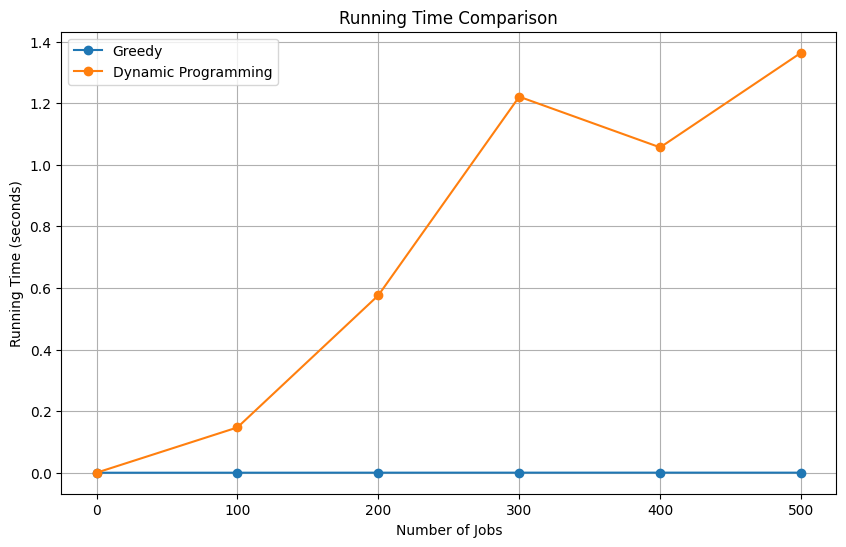

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import gdown

# Mengimpor library yang diperlukan
# pandas untuk manipulasi dan analisis data
# matplotlib.pyplot untuk membuat plot grafik
# time untuk menghitung waktu eksekusi fungsi
# gdown untuk mengunduh file dari Google Drive

# Mendownload data dari Google Drive
dummy_data_path = 'https://drive.google.com/uc?id=1S63M075IoFHTyAAYkxGDet6IOI4T5t5S'
output_path = 'dummy_data.csv'
gdown.download(dummy_data_path, output_path, quiet=False)

# Memuat data dummy menggunakan pandas
dummy_data = pd.read_csv(output_path, delimiter=';')

# Mendefinisikan kelas Job
class Job:
    def __init__(self, job_id, processing_time, due_date):
        self.job_id = job_id
        self.processing_time = processing_time
        self.due_date = due_date

# Mengonversi data menjadi daftar objek Job
jobs = [Job(row['ID'], row['Processing_Time'], row['Due_Date']) for index, row in dummy_data.iterrows()]

# Mengimplementasikan algoritma Greedy
def greedy_schedule(jobs):
    jobs.sort(key=lambda job: job.due_date)
    current_time = 0
    total_late = 0

    for job in jobs:
        current_time += job.processing_time
        if current_time > job.due_date:
            total_late += (current_time - job.due_date)

    return total_late

# Mengimplementasikan algoritma Dynamic Programming
def dynamic_programming_schedule(jobs):
    n = len(jobs)
    max_time = sum(job.processing_time for job in jobs)

    dp = [[float('inf')] * (max_time + 1) for _ in range(n + 1)]
    dp[0][0] = 0

    for i in range(1, n + 1):
        job = jobs[i - 1]
        for t in range(max_time + 1):
            if t >= job.processing_time:
                dp[i][t] = min(dp[i][t], dp[i - 1][t - job.processing_time] + max(0, t - job.due_date))
            dp[i][t] = min(dp[i][t], dp[i - 1][t])

    return min(dp[n])

# Mengukur waktu eksekusi untuk berbagai jumlah pekerjaan
# num_jobs_list = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
num_jobs_list = [0, 100, 200, 300, 400, 500]
greedy_times = []
dp_times = []

for num_jobs in num_jobs_list:
    subset_jobs = jobs[:num_jobs]

    start_time = time.time()
    greedy_schedule(subset_jobs)
    greedy_times.append(time.time() - start_time)

    start_time = time.time()
    dynamic_programming_schedule(subset_jobs)
    dp_times.append(time.time() - start_time)

# Mencetak waktu eksekusi di terminal
print("Number of Jobs\tGreedy Time (seconds)\tDynamic Programming Time (seconds)")
for num_jobs, greedy_time, dp_time in zip(num_jobs_list, greedy_times, dp_times):
    print(f"{num_jobs}\t\t{greedy_time:.6f}\t\t\t{dp_time:.6f}")

# Membuat plot hasil
plt.figure(figsize=(10, 6))
plt.plot(num_jobs_list, greedy_times, label='Greedy', marker='o')
plt.plot(num_jobs_list, dp_times, label='Dynamic Programming', marker='o')

plt.xlabel('Number of Jobs')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time Comparison')
plt.legend()
plt.grid(True)
plt.show()
